In [25]:
from statsbombpy import sb
import pandas as pd
import numpy as np

In [2]:
sb.competitions().tail()
# Euro 2020 competition id = 55, season id = 43

C:\Users\enesf\anaconda3\lib\site-packages\statsbombpy\api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
35,11,37,Spain,La Liga,male,False,False,2004/2005,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00
36,49,3,United States of America,NWSL,female,False,False,2018,2021-11-06T05:53:29.435016,2021-06-13T16:17:31.694,None,2021-11-06T05:53:29.435016
37,2,44,England,Premier League,male,False,False,2003/2004,2021-11-14T22:29:00.646120,2021-06-13T16:17:31.694,None,2021-11-14T22:29:00.646120
38,55,43,Europe,UEFA Euro,male,False,True,2020,2022-02-01T17:20:34.319496,2021-11-11T13:54:37.507376,2021-11-11T13:54:37.507376,2022-02-01T17:20:34.319496
39,72,30,International,Women's World Cup,female,False,True,2019,2020-07-29T05:00,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [3]:
matches = sb.matches(55,43)

C:\Users\enesf\anaconda3\lib\site-packages\statsbombpy\api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [4]:
match_id = matches[matches.competition_stage == 'Final'].match_id
match_id

4    3795506
Name: match_id, dtype: int64

In [5]:
events = sb.events(int(match_id))

In [6]:
events['player'].value_counts()

Marco Verratti                 382
Leonardo Bonucci               373
Jorge Luiz Frello Filho        347
Giorgio Chiellini              326
Giovanni Di Lorenzo            252
Lorenzo Insigne                237
Emerson Palmieri dos Santos    218
Luke Shaw                      199
Kalvin Phillips                198
Harry Maguire                  191
John Stones                    164
Harry Kane                     161
Nicolò Barella                 146
Kyle Walker                    136
Federico Chiesa                133
Declan Rice                    128
Mason Mount                    125
Raheem Sterling                119
Bryan Cristante                118
Jordan Pickford                115
Gianluigi Donnarumma            96
Kieran Trippier                 86
Ciro Immobile                   85
Bukayo Saka                     85
Domenico Berardi                85
Federico Bernardeschi           62
Jordan Brian Henderson          62
Manuel Locatelli                44
Andrea Belotti      

In [7]:
events['type'].value_counts()

Pass                 1350
Ball Receipt*        1317
Carry                1106
Pressure              370
Ball Recovery          93
Duel                   92
Dribble                51
Foul Committed         47
Goal Keeper            42
Foul Won               42
Clearance              39
Shot                   35
Block                  35
Interception           35
Dribbled Past          34
Miscontrol             28
Dispossessed           27
Substitution           11
Half Start             10
Half End               10
Tactical Shift          7
Injury Stoppage         5
Player Off              3
Player On               3
Starting XI             2
Referee Ball-Drop       2
Name: type, dtype: int64

In [8]:
from FCPython import createPitch

In [9]:
pass_ver = events[(events['player']=='Marco Verratti') & (events['type']=='Pass')]

In [10]:
len(pass_ver)

119

In [11]:
pass_ver[['location','pass_end_location']]

,location,pass_end_location
13,"[48.0, 35.7]","[39.0, 70.7]"
41,"[44.7, 18.6]","[37.5, 28.9]"
52,"[29.6, 48.1]","[40.4, 72.9]"
55,"[48.9, 69.8]","[36.0, 44.1]"
57,"[48.3, 52.2]","[54.3, 40.0]"
...,...,...
1069,"[70.2, 12.0]","[62.8, 12.0]"
1071,"[65.5, 15.5]","[55.0, 31.1]"
1081,"[43.1, 12.0]","[53.4, 13.7]"
1107,"[48.9, 19.4]","[42.1, 37.6]"


In [12]:
import matplotlib.pyplot as plt

In [13]:
pass_ver.reindex(range(len(pass_ver)))

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
location = [(a,b) for (a,b) in pass_ver['location']]
pass_end_location = [(a,b) for (a,b) in pass_ver['pass_end_location']]


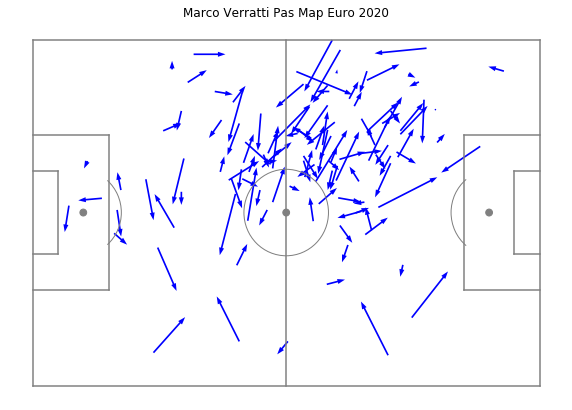

In [46]:
pitch_width = 120
pitch_height = 80
fig,ax = createPitch(pitch_width,pitch_height,'yards','gray')

x1 = np.array([el[0] for el in location])
y1 = pitch_height-np.array([el[1] for el in location])
x2 = np.array([el[0] for el in pass_end_location])
y2 = pitch_height-np.array([el[1] for el in pass_end_location])

u = x2-x1
v = y2-y1
ax.quiver(x1, y1, u, v, color='blue', width=0.003, headlength=4.5)

plt.title('Marco Verratti Pas Map Euro 2020')
fig.set_size_inches(10, 7)
fig.savefig('Verratti_Pas_Map_Euro_2020_Finalxx', dpi=300) 

plt.show()
    

In [42]:
shots = events[(events['type'] == 'Shot')]
shot_lor = shots[shots.player == 'Lorenzo Insigne']
shot_lor

,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,counterpress,dribble_nutmeg,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
4357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.037582,Normal,Free Kick,NaN,NaN,NaN,Italy,00:07:04.491,Shot,NaN
4358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.014960,Normal,Open Play,NaN,NaN,NaN,Italy,00:27:13.854,Shot,NaN
4363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.102544,Normal,Free Kick,NaN,NaN,NaN,Italy,00:05:11.552,Shot,NaN
4364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.024812,Normal,Open Play,NaN,NaN,NaN,Italy,00:07:37.695,Shot,NaN
4367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.079823,Normal,Open Play,NaN,NaN,NaN,Italy,00:11:16.985,Shot,NaN


In [43]:
location_lor = [(a,b) for (a,b) in shot_lor['location']]

[ 95.   88.1  97.8 105.8 117.9]
[120 120 120 120 120]


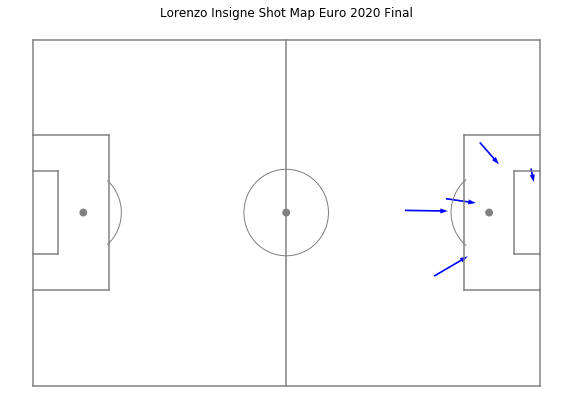

In [53]:
pitch_width = 120
pitch_height = 80
fig,ax = createPitch(pitch_width,pitch_height,'yards','gray')

x1 = np.array([el[0] for el in location_lor])
y1 = pitch_height-np.array([el[1] for el in location_lor])
x2 = np.full(len(x1),120)
y2 = np.full(len(y1),40)


u = x2-x1
v = y2-y1
ax.quiver(x1, y1, u, v, color='blue', width=0.003, headlength=4.5)

print(x1)
print(x2)

plt.title('Lorenzo Insigne Shot Map Euro 2020 Final')
fig.set_size_inches(10, 7)
fig.savefig('Lorenzo_Insigne_Shot_Map_Euro_2020_Final', dpi=300) 
plt.show()
    

In [31]:
plt.show()

In [18]:
import numpy as np
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

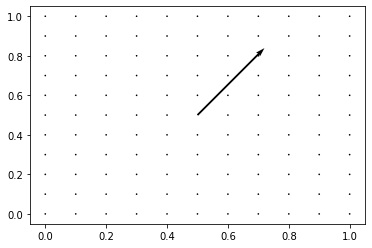

In [19]:
x = np.linspace(0,1,11)
y = np.linspace(1,0,11)
u = v = np.zeros((11,11))
u[5,5] = 0.2

plt.quiver(x, y, u, v, scale=1)

In [20]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [21]:
y

array([1. , 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0. ])

In [22]:
u

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [23]:
v

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])